# Data Analysis Interview Challenge

This notebook will guide you through solving the Data Analysis Interview Challenge in a structured manner. We will tackle each part of the challenge step by step, including code, analysis, and reporting.

## Part 1: Exploratory Data Analysis

We will start by analyzing the `logins.json` file to understand user login patterns.

### Step 1: Load and Inspect the Data
We will load the data and inspect its structure to understand what we are working with.

In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [22]:
# Load the data
data_path = 'logins.json'
with open(data_path, 'r') as file:
    logins = json.load(file)

# Convert to DataFrame
login_df = pd.DataFrame(logins, columns=['login_time'])

# Convert login_time to datetime
login_df['login_time'] = pd.to_datetime(login_df['login_time'])

# Display the first few rows
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### Step 2: Aggregate Login Counts
We will aggregate the login counts based on 15-minute intervals to analyze the time series data.

In [23]:
# Set the login_time as the index
login_df.set_index('login_time', inplace=True)

# Resample the data in 15-minute intervals
login_counts = login_df.resample('15T').size()

# Display the first few rows of the aggregated data
login_counts.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15min, dtype: int64

### Step 3: Visualize the Time Series
We will visualize the aggregated login counts to identify patterns and cycles.

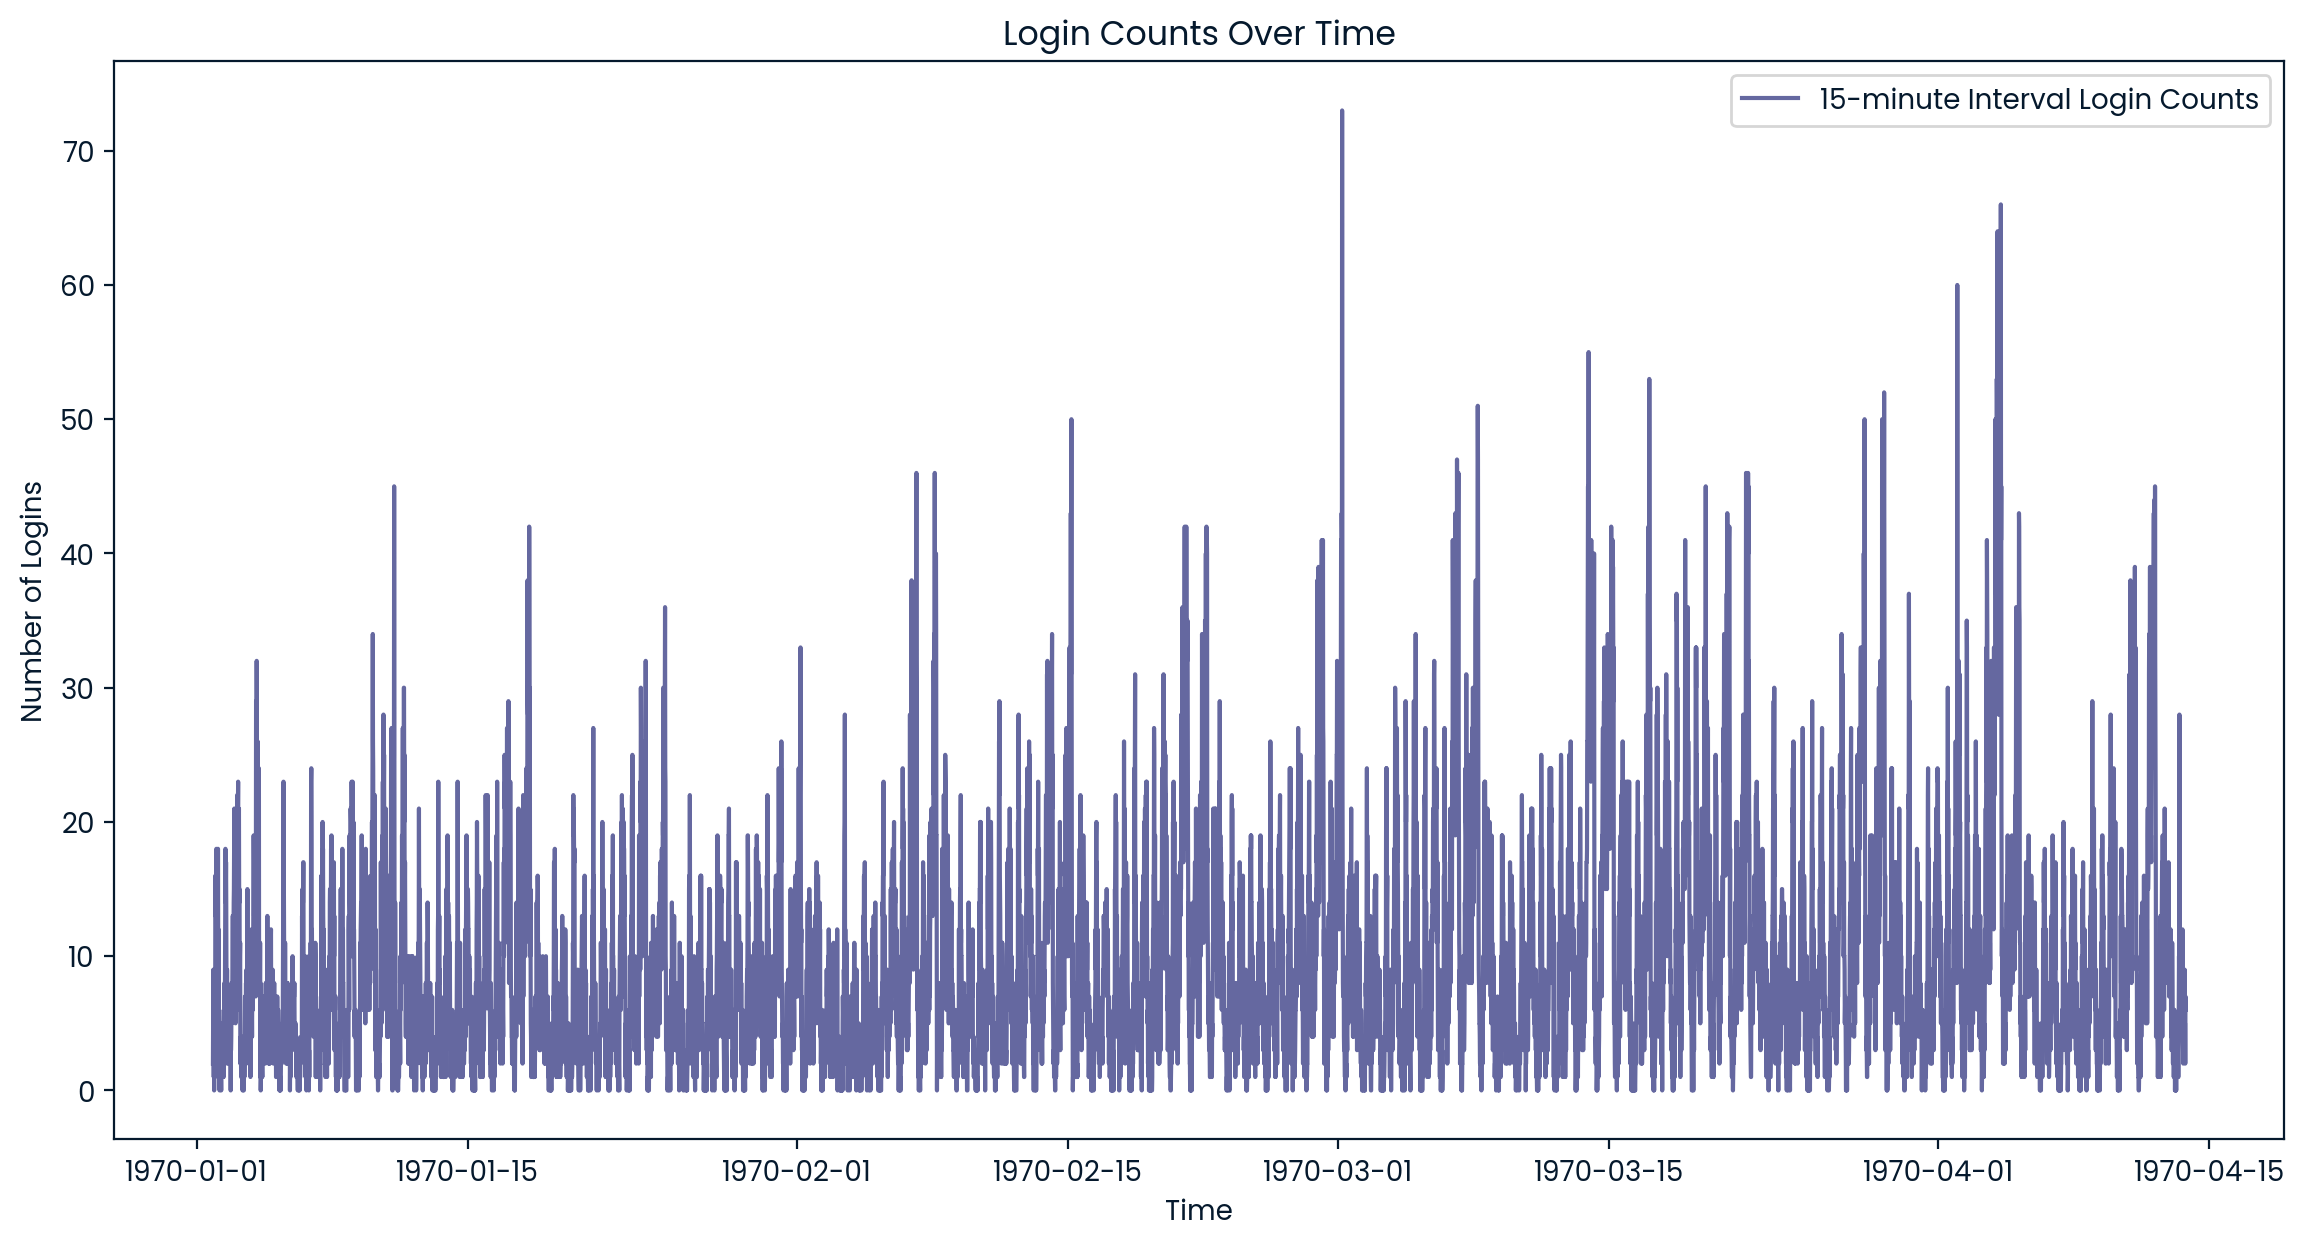

In [24]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(login_counts, label='15-minute Interval Login Counts')
plt.title('Login Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.legend()
plt.show()

### Step 4: Analyze Patterns
We will describe the patterns observed in the time series plot, such as daily cycles and any anomalies.

- **Daily Cycles**: Look for patterns that repeat every 24 hours.
- **Anomalies**: Identify any unusual spikes or drops in login counts.

### Step 5: Data Quality Issues
If there are any data quality issues, such as missing data or outliers, we will report them here.

## Part 2: Experiment and Metrics Design

### Key Measure of Success
The key measure of success for the experiment to encourage driver partners to serve both cities would be the **increase in the number of trips that cross the toll bridge**. This metric directly measures the effectiveness of reimbursing toll costs in encouraging cross-city service.

### Experiment Design
1. **Implementation**: Randomly select a group of driver partners to receive toll reimbursements and compare their cross-city trip counts to a control group that does not receive reimbursements.
2. **Statistical Tests**: Use a t-test to compare the means of cross-city trips between the two groups.
3. **Interpretation**: If the test shows a significant increase in cross-city trips for the treatment group, recommend implementing the reimbursement policy. Consider potential confounding factors and ensure randomization is properly executed.

## Part 3: Predictive Modeling

### Step 1: Load and Inspect the Data
We will load the `ultimate_data_challenge.json` file and inspect its structure.

In [25]:
# Load the data
data_path = 'ultimate_data_challenge.json'
with open(data_path, 'r') as file:
    ultimate_data = json.load(file)

# Convert to DataFrame
ultimate_df = pd.DataFrame(ultimate_data)

# Display the first few rows
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### Step 2: Data Cleaning and Exploration
We will clean the data and perform exploratory analysis to understand the factors affecting user retention.

In [26]:
# Convert date columns to datetime
date_columns = ['signup_date', 'last_trip_date']
for col in date_columns:
    ultimate_df[col] = pd.to_datetime(ultimate_df[col])

# Calculate retention (active in the last 30 days)
cutoff_date = ultimate_df['last_trip_date'].max() - pd.Timedelta(days=30)
ultimate_df['retained'] = ultimate_df['last_trip_date'] > cutoff_date

# Display retention rate
retention_rate = ultimate_df['retained'].mean()
retention_rate

0.3662

### Step 3: Build a Predictive Model
We will build a predictive model to determine whether a user will be active in their 6th month on the system.

In [27]:
# Prepare features and target
features = ultimate_df.drop(columns=['signup_date', 'last_trip_date', 'retained'])
target = ultimate_df['retained']

# One-hot encode categorical features
categorical_features = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(features[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
features = features.drop(columns=categorical_features)
features = pd.concat([features.reset_index(drop=True), encoded_features.reset_index(drop=True)], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.83      0.82      6322
        True       0.69      0.65      0.67      3678

    accuracy                           0.76     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



### Step 4: Model Evaluation and Insights
- **Model Performance**: Evaluate the model using metrics such as precision, recall, and F1-score.
- **Insights**: Discuss how Ultimate might leverage these insights to improve long-term rider retention, such as targeting users with specific characteristics for retention campaigns.

### Conclusion
This notebook provided a structured approach to solving the Data Analysis Interview Challenge, including exploratory data analysis, experiment design, and predictive modeling. The insights gained can help inform strategic decisions for improving user engagement and retention.